#### Feature Engineering - One-Hot Encoding

In [3]:
import pandas as pd

# Load the data from the CSV file into a DataFrame
file_path = "../data/crime_data.csv"  # Replace "path_to_your_csv_file.csv" with the actual file path
data_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
# print(data_df.head())

/tmp/ipykernel_42445/515783515.py:5: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


### Pro Tips

**Inspect Data Types**: Check the data types of columns in your dataset to identify categorical variables. Categorical variables are typically of type 'object' in pandas DataFrame.

**Unique Values**: For potential categorical columns, check the number of unique values to assess if they are suitable for one-hot encoding. Columns with a limited number of unique values are good candidates.

**Value Counts**: Examine the distribution of unique values in categorical columns using the value_counts() function. This gives you an idea of the frequency of each category and helps identify sparse categories.

**Visual Inspection**: Visualize the distribution of categorical variables using bar plots or histograms to gain a better understanding of their distribution and potential patterns.

In [4]:
# Inspect data types of columns
print(data_df.dtypes)

# Check unique values and value counts for potential categorical columns
for column in data_df.columns:
    if data_df[column].dtype == 'object':  # Check if the column is of type 'object'
        print(f"Column: {column}")
        print(f"Number of Unique Values: {data_df[column].nunique()}")
        print(f"Value Counts:\n{data_df[column].value_counts()}\n")


OBJECTID                     int64
Report Number                int64
Report Date                 object
Offense Start Date          object
Offense End Date            object
Day of the week             object
Day Number                   int64
Zone                         int64
Beat                        object
Location                    object
Location Type               object
NIBRS Code                  object
NIBRS Code Name             object
Crime Against               object
Was a firearm involved?     object
Press Release               object
Social Media                object
Watch                       object
Longitude                  float64
Latitude                   float64
Neighborhood                object
NPU                         object
Council District           float64
UCR Grouping                object
Victim Count               float64
GlobalID                    object
x                          float64
y                          float64
dtype: object
Column

### Rules of Thumb
A good rule of thumb for determining if a categorical variable has too many unique values depends on several factors, including the size of your dataset, the complexity of your model, and the potential impact on model performance. However, here are some general guidelines:

1. **Large Number of Categories**: If a categorical variable has a large number of unique values relative to the size of your dataset, it can lead to sparsity in the one-hot encoded representation. As a rule of thumb, if a categorical variable has more than 10-15 unique values, you may want to consider alternative encoding methods or strategies for handling it.

2. **Model Complexity**: Adding too many one-hot encoded columns to your dataset can significantly increase the dimensionality of the feature space, which can lead to computational inefficiency and overfitting, especially for models with limited capacity (e.g., linear models). Consider the complexity of your model and its ability to handle high-dimensional data.

3. **Frequency of Categories**: Even if a categorical variable has a large number of unique values, it may still be suitable for one-hot encoding if the categories are well-distributed and each category occurs frequently enough to provide meaningful information to the model. On the other hand, if certain categories are rare or occur infrequently, they may not contribute much to the model's predictive power.

4. **Domain Knowledge**: Consider the domain-specific context of your data and the relevance of each category to the problem you're trying to solve. Some categorical variables may have a large number of unique values but still provide valuable information for prediction or classification tasks.

Ultimately, there is no strict cutoff for the number of unique values that constitutes "too many" for one-hot encoding. It's important to balance the benefits of encoding categorical variables with the potential drawbacks of increased dimensionality and model complexity. Experimentation and domain expertise are key to determining the most appropriate encoding strategy for your specific dataset and modeling objectives.


#### Drop All Cols W/ > 15 Unique Values

In [7]:
# Create a list of columns with fewer than or equal to 15 unique values
columns_to_keep = [column for column in data_df.columns if data_df[column].nunique() <= 15]

# Create a new DataFrame containing only the selected columns
new_data_df = data_df[columns_to_keep].copy()

# Display the first few rows of the new DataFrame
# print(new_data_df.head())

column_names = new_data_df.columns.tolist()
print(column_names)



['Day of the week', 'Day Number', 'Zone', 'Crime Against', 'Was a firearm involved?', 'Watch', 'Council District', 'UCR Grouping']


#### Exploring Data Distribution

In [8]:
# Convert columns to appropriate data types
new_data_df['Day of the week'] = new_data_df['Day of the week'].astype('category')
new_data_df['Day Number'] = new_data_df['Day Number'].astype('category')
new_data_df['Zone'] = new_data_df['Zone'].astype('category')
new_data_df['Crime Against'] = new_data_df['Crime Against'].astype('category')
new_data_df['Was a firearm involved?'] = new_data_df['Was a firearm involved?'].astype(bool)
new_data_df['Watch'] = new_data_df['Watch'].astype('category')
new_data_df['Council District'] = new_data_df['Council District'].astype('category')
new_data_df['UCR Grouping'] = new_data_df['UCR Grouping'].astype('category')


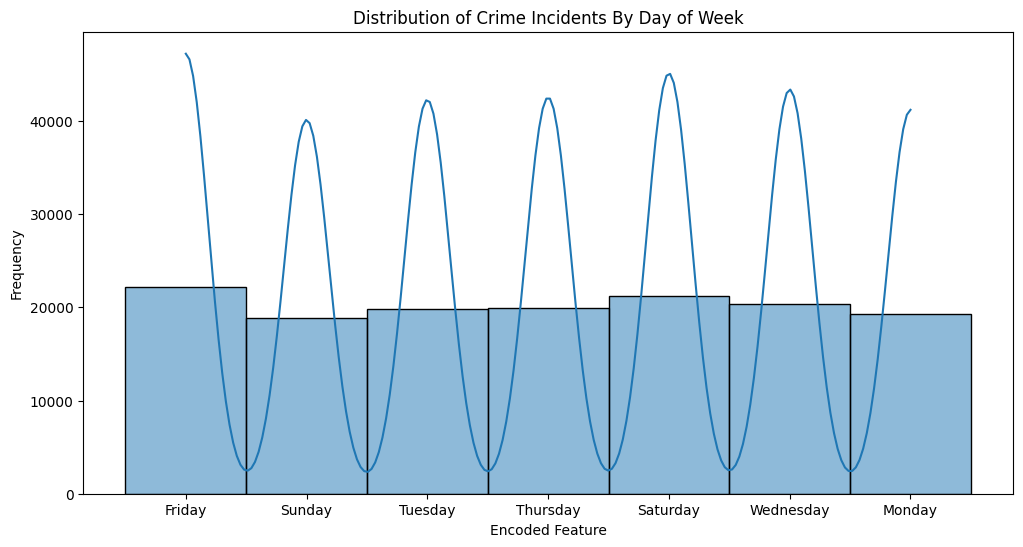

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_df' is your DataFrame containing the original data

# Perform one-hot encoding on categorical columns
categorical_columns = ['Day of the week', 'Zone', 'Crime Against', 'Watch', 'Council District', 'UCR Grouping']
encoder = OneHotEncoder(drop='first')  # No need to specify 'sparse' parameter here
encoded_features = encoder.fit_transform(data_df[categorical_columns])

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_column_names)  # Convert sparse matrix to array

# Concatenate original DataFrame with encoded DataFrame
final_df = pd.concat([data_df, encoded_df], axis=1)

# Visualize data distribution of encoded features
# For example, you can use seaborn or matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of encoded features
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='Day of the week', bins=20, kde=True)
plt.title('Distribution of Crime Incidents By Day of Week')
plt.xlabel('Encoded Feature')
plt.ylabel('Frequency')
plt.show()


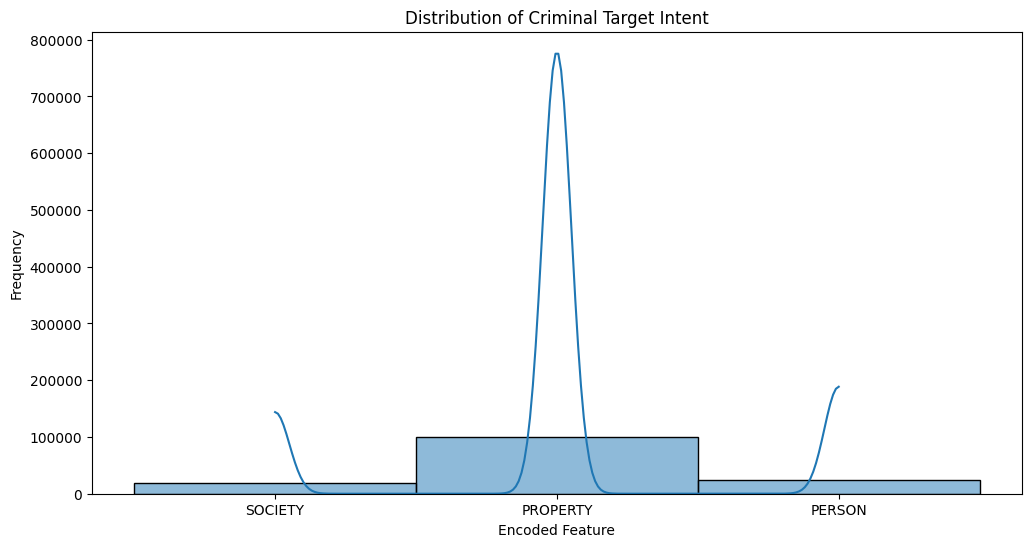

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_df' is your DataFrame containing the original data

# Perform one-hot encoding on categorical columns
categorical_columns = ['Day of the week', 'Zone', 'Crime Against', 'Watch', 'Council District', 'UCR Grouping']
encoder = OneHotEncoder(drop='first')  # No need to specify 'sparse' parameter here
encoded_features = encoder.fit_transform(data_df[categorical_columns])

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_column_names)  # Convert sparse matrix to array

# Concatenate original DataFrame with encoded DataFrame
final_df = pd.concat([data_df, encoded_df], axis=1)

# Visualize data distribution of encoded features
# For example, you can use seaborn or matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of encoded features
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='Crime Against', bins=10
             , kde=True)
plt.title('Distribution of Criminal Target Intent')
plt.xlabel('Encoded Feature')
plt.ylabel('Frequency')
plt.show()


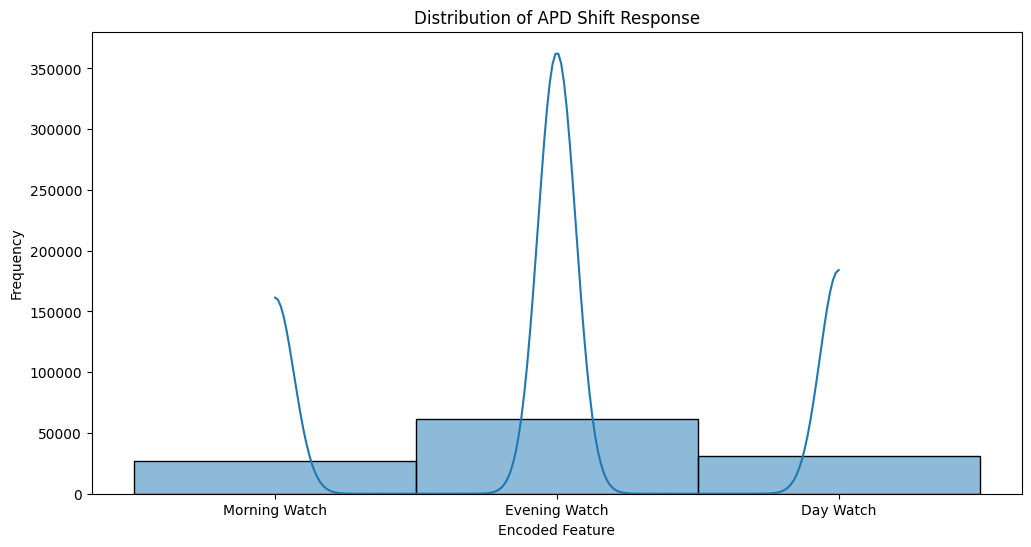

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_df' is your DataFrame containing the original data

# Perform one-hot encoding on categorical columns
categorical_columns = ['Day of the week', 'Zone', 'Crime Against', 'Watch', 'Council District', 'UCR Grouping']
encoder = OneHotEncoder(drop='first')  # No need to specify 'sparse' parameter here
encoded_features = encoder.fit_transform(data_df[categorical_columns])

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_column_names)  # Convert sparse matrix to array

# Concatenate original DataFrame with encoded DataFrame
final_df = pd.concat([data_df, encoded_df], axis=1)

# Visualize data distribution of encoded features
# For example, you can use seaborn or matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of encoded features
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='Watch', bins=10
             , kde=True)
plt.title('Distribution of APD Shift Response')
plt.xlabel('Encoded Feature')
plt.ylabel('Frequency')
plt.show()

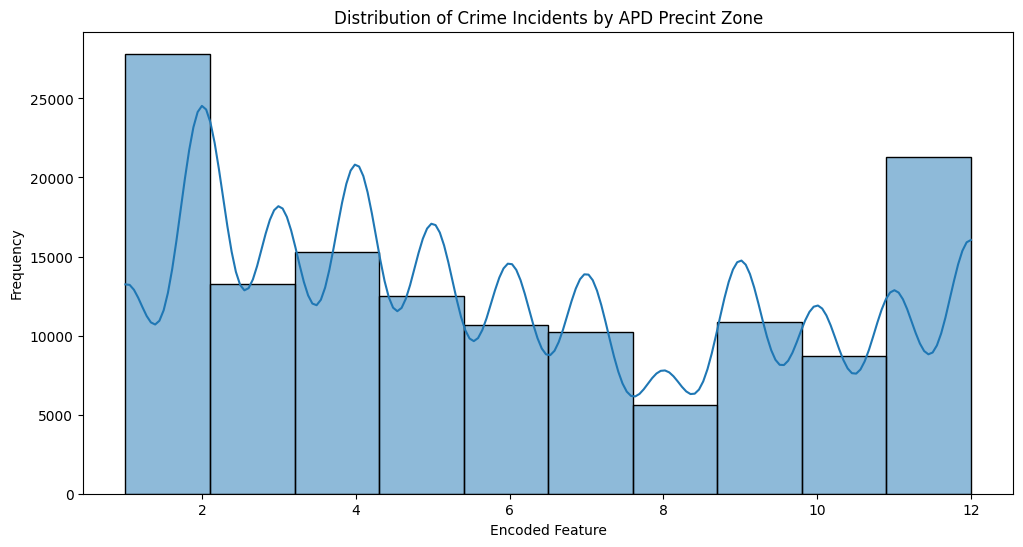

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data_df' is your DataFrame containing the original data

# Perform one-hot encoding on categorical columns
categorical_columns = ['Day of the week', 'Zone', 'Crime Against', 'Watch', 'Council District', 'UCR Grouping']
encoder = OneHotEncoder(drop='first')  # No need to specify 'sparse' parameter here
encoded_features = encoder.fit_transform(data_df[categorical_columns])

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_column_names)  # Convert sparse matrix to array

# Concatenate original DataFrame with encoded DataFrame
final_df = pd.concat([data_df, encoded_df], axis=1)

# Visualize data distribution of encoded features
# For example, you can use seaborn or matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of encoded features
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='Council District', bins=10
             , kde=True)
plt.title('Distribution of Crime Incidents by APD Precint Zone')
plt.xlabel('Encoded Feature')
plt.ylabel('Frequency')
plt.show()

### Feature Interaction

#### Pro Tips: Feature Interactions

When working with feature interaction, there are several best practices to consider to ensure that you're creating meaningful and effective new features:

1. **Domain Knowledge**: Understand the domain of your data and the relationships between features. This knowledge can guide the creation of interaction features that are relevant and meaningful.

2. **Start Simple**: Begin with simple interaction features, such as multiplication or addition of two features, before exploring more complex interactions. Simple interactions are easier to interpret and may capture important relationships in the data.

3. **Visualize Relationships**: Visualize relationships between features and the target variable to identify potential interaction patterns. Scatter plots, heatmaps, and pair plots can help visualize how features interact with each other and with the target variable.

4. **Assess Feature Importance**: Evaluate the importance of interaction features using techniques such as feature importance from tree-based models (e.g., Random Forest, Gradient Boosting) or permutation importance. This helps determine which interaction features are most relevant for predicting the target variable.

5. **Cross-validation**: Validate the performance of models with interaction features using cross-validation techniques. This helps assess the generalization performance of the model and ensures that the interaction features are not overfitting to the training data.

6. **Regularization**: When using models with regularization (e.g., Lasso, Ridge regression), consider including interaction features along with the original features. Regularization can help prevent overfitting and select the most informative features, including interaction terms.

7. **Feature Scaling**: Scale or normalize features before creating interaction features, especially if the features are on different scales. This ensures that the interaction features are not dominated by features with larger magnitudes.

8. **Feature Engineering Pipeline**: Incorporate feature interaction as part of your feature engineering pipeline. This allows for systematic exploration of different interaction features and their impact on model performance.

9. **Iterative Process**: Feature interaction is often an iterative process. Experiment with different combinations of features and interaction terms, evaluate their performance, and refine your approach based on the results.

10. **Documentation and Interpretation**: Document the creation process of interaction features and their interpretation. This helps maintain transparency and facilitates collaboration with stakeholders.

In [27]:
column_names = data_df.columns.tolist()
print(column_names)


['OBJECTID', 'Report Number', 'Report Date', 'Offense Start Date', 'Offense End Date', 'Day of the week', 'Day Number', 'Zone', 'Beat', 'Location', 'Location Type', 'NIBRS Code', 'NIBRS Code Name', 'Crime Against', 'Was a firearm involved?', 'Press Release', 'Social Media', 'Watch', 'Longitude', 'Latitude', 'Neighborhood', 'NPU', 'Council District', 'UCR Grouping', 'Victim Count', 'GlobalID', 'x', 'y']


In [26]:
import pandas as pd

# Assume 'data_df' is your DataFrame containing the data

# Create interaction features by multiplying two existing features
data_df['interaction_feature1_feature2'] = data_df['feature1'] * data_df['feature2']
data_df['interaction_feature3_feature4'] = data_df['feature3'] * data_df['feature4']

# You can create more interaction features as needed

# Now 'data_df' contains the original features along with the new interaction features

KeyError: 'feature1'